In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

conn = psycopg2.connect(
    dbname="ecommerce_analysis",
    user="postgres",
    password="Password",     
    host="localhost",
    port="5432"
)

cur = conn.cursor()

1. List all unique cities where customers are located. 

In [129]:
query = """ SELECT DISTINCT customer_city FROM customers"""
cur.execute(query)
data = cur.fetchall()
data

[('bom jardim de minas',),
 ('alto rio doce',),
 ('alvorada do gurgueia',),
 ('batatais',),
 ('capao da porteira',),
 ('icatu',),
 ('osorio',),
 ('populina',),
 ('novo mundo',),
 ('tururu',),
 ("alta floresta d'oeste",),
 ('cajamar',),
 ('presidente lucena',),
 ('santa maria do salto',),
 ('cacador',),
 ('araxa',),
 ('carnaubais',),
 ('lindolfo collor',),
 ('japira',),
 ('botelho',),
 ('tabapua',),
 ('joao camara',),
 ('barrolandia',),
 ('nepomuceno',),
 ('ibertioga',),
 ('frei lagonegro',),
 ('sao jose da barra',),
 ('pitangui',),
 ('jaragua do sul',),
 ('ervalia',),
 ('governador celso ramos',),
 ('santa ernestina',),
 ('quatro bocas',),
 ('grao mogol',),
 ('diamantina',),
 ('itaju',),
 ('tiradentes',),
 ('junqueiro',),
 ('macambira',),
 ('barauna',),
 ('ibirapua',),
 ('uniao do sul',),
 ('palma',),
 ('agrolandia',),
 ('bom jesus da serra',),
 ('surubim',),
 ('unai',),
 ('formosa do rio preto',),
 ('medianeira',),
 ('japoata',),
 ('emilianopolis',),
 ('lupionopolis',),
 ('ivai',),
 (

2. Count the number of orders placed in 2017. 

In [130]:
Count_of_number = """ SELECT  COUNT(order_delivered_customer_date)	AS total_No_order_placed,
		year
FROM (
	SELECT EXTRACT( YEAR FROM order_delivered_customer_date::DATE) AS year, order_delivered_customer_date
	FROM orders 
	WHERE order_delivered_customer_date IS NOT NULL )
WHERE year = '2017'
GROUP BY year"""

cur.execute(Count_of_number)
data = cur.fetchall()
data

[(40930, Decimal('2017'))]

3. Find the total sales per category.

In [131]:
Total_sales = """ SELECT  
	p."product category", 
	COUNT(o.order_id) AS total_orders
FROM order_items AS o
JOIN products AS p
	ON p.product_id = o.product_id 
WHERE p."product category" IS NOT NULL
GROUP BY p."product category"
ORDER BY total_orders DESC
"""

cur.execute(Total_sales)
data = cur.fetchall()
data

[('bed table bath', 11115),
 ('HEALTH BEAUTY', 9670),
 ('sport leisure', 8641),
 ('Furniture Decoration', 8334),
 ('computer accessories', 7827),
 ('housewares', 6964),
 ('Watches present', 5991),
 ('telephony', 4545),
 ('Garden tools', 4347),
 ('automotive', 4235),
 ('toys', 4117),
 ('Cool Stuff', 3796),
 ('perfumery', 3419),
 ('babies', 3065),
 ('electronics', 2767),
 ('stationary store', 2517),
 ('Fashion Bags and Accessories', 2031),
 ('pet Shop', 1947),
 ('Furniture office', 1691),
 ('Games consoles', 1137),
 ('Bags Accessories', 1092),
 ('Construction Tools Construction', 929),
 ('home appliances', 771),
 ('musical instruments', 680),
 ('electrostile', 679),
 ('Casa Construcao', 604),
 ('General Interest Books', 553),
 ('foods', 510),
 ('Room Furniture', 503),
 ('House comfort', 434),
 ('drinks', 379),
 ('audio', 364),
 ('Market Place', 311),
 ('Construction Tools Illumination', 304),
 ('climatization', 297),
 ('Furniture Kitchen Service Area Dinner and Garden', 281),
 ('Drink fo

4. Calculate the percentage of orders that were paid in installments.

In [132]:
conn.rollback()
order_percentage = """SELECT DISTINCT payment_installments,
		ROUND(COUNT(payment_installments) * 100.0 / (SELECT COUNT(payment_installments)
														FROM payments
														WHERE payment_installments > 1 ) 	:: NUMERIC ,3 ) AS payment_percentage 
FROM payments
WHERE payment_installments > 1
GROUP BY payment_installments"""

cur.execute(order_percentage)
data = cur.fetchall()
data

[(2, Decimal('24.179')),
 (3, Decimal('20.377')),
 (4, Decimal('13.826')),
 (5, Decimal('10.205')),
 (6, Decimal('7.636')),
 (7, Decimal('3.167')),
 (8, Decimal('8.314')),
 (9, Decimal('1.254')),
 (10, Decimal('10.378')),
 (11, Decimal('0.045')),
 (12, Decimal('0.259')),
 (13, Decimal('0.031')),
 (14, Decimal('0.029')),
 (15, Decimal('0.144')),
 (16, Decimal('0.010')),
 (17, Decimal('0.016')),
 (18, Decimal('0.053')),
 (20, Decimal('0.033')),
 (21, Decimal('0.006')),
 (22, Decimal('0.002')),
 (23, Decimal('0.002')),
 (24, Decimal('0.035'))]

5. Count the number of customers from each state. 

In [133]:
count_of_customer = """SELECT geolocation_state, COUNT(DISTINCT geolocation_zip_code_prefix) AS cutotal_customers 
FROM geolocation
GROUP BY geolocation_state
ORDER BY cutotal_customers DESC
"""
cur.execute(count_of_customer)
data = cur.fetchall()
data 

[('SP', 6349),
 ('MG', 1868),
 ('RJ', 1390),
 ('RS', 1132),
 ('PR', 1046),
 ('BA', 992),
 ('GO', 773),
 ('SC', 620),
 ('PE', 596),
 ('CE', 548),
 ('DF', 516),
 ('PB', 324),
 ('ES', 315),
 ('MA', 313),
 ('PA', 309),
 ('PI', 307),
 ('RN', 280),
 ('MT', 254),
 ('MS', 242),
 ('TO', 184),
 ('AL', 178),
 ('AM', 144),
 ('SE', 135),
 ('RO', 108),
 ('AC', 46),
 ('RR', 28),
 ('AP', 26)]

__Intermediate Queries__

1. Calculate the number of orders per month in 2018.

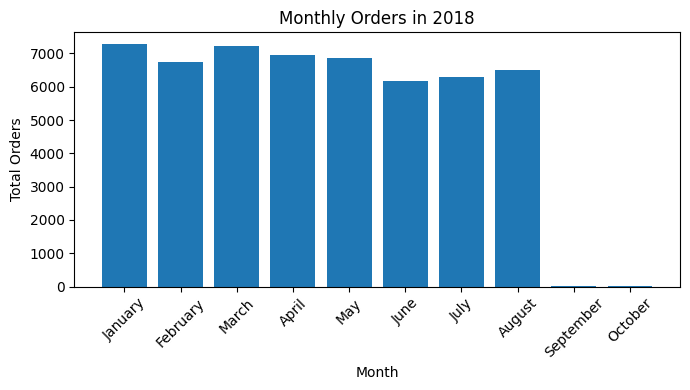

In [134]:
number_of_order = """
SELECT  
  EXTRACT(MONTH FROM order_purchase_timestamp::DATE) AS month_no,
  INITCAP(TO_CHAR(order_purchase_timestamp::DATE, 'Month')) AS order_month,
  COUNT(order_id) AS total_orders
FROM orders
WHERE order_purchase_timestamp::DATE 
      BETWEEN '2018-01-01' AND '2018-12-31'
GROUP BY month_no, order_month
ORDER BY month_no"""

cur.execute(number_of_order)
data = cur.fetchall()

# Unpack the SQL result data
month_numbers = [row[0] for row in data]
month_names = [row[1].strip() for row in data]
total_orders = [row[2] for row in data]

plt.figure(figsize=(7, 4))  
plt.bar(month_names, total_orders)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.title("Monthly Orders in 2018")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Find the average number of products per order, grouped by customer city.

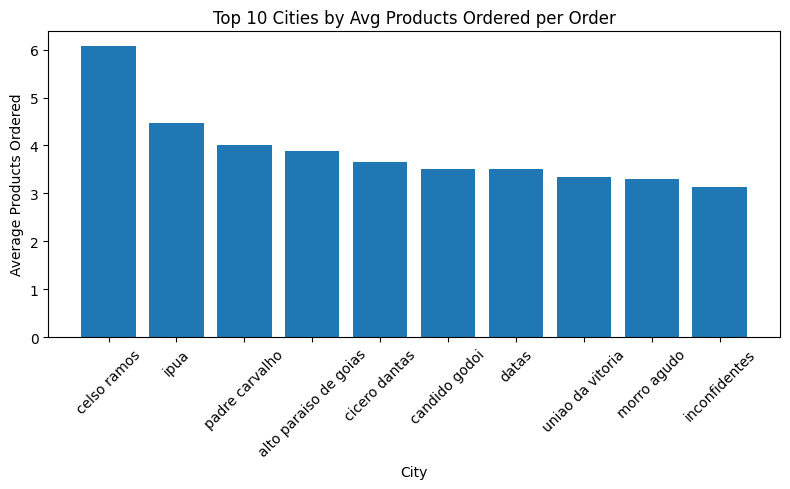

In [135]:
avg_product_order = """SELECT DISTINCT (c.customer_city), ROUND(AVG(oi.order_item_id):: NUMERIC,2) AS avg_order
FROM orders AS o
JOIN order_items AS oi
ON o.order_id = oi.order_id
JOIN customers AS c
ON c.customer_id = o.customer_id 
WHERE c.customer_city IS NOT NULL
GROUP BY c.customer_city 
ORDER BY avg_order DESC
"""

cur.execute(avg_product_order)
data = cur.fetchall()
data


top_10_data = data[:10]

# Separate into x (cities) and y (average orders)
cities = [row[0] for row in top_10_data]
avg_orders = [row[1] for row in top_10_data]

# Create Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(cities, avg_orders)

# Add chart labels
plt.xlabel("City")
plt.ylabel("Average Products Ordered")
plt.title("Top 10 Cities by Avg Products Ordered per Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Calculate the percentage of total revenue contributed by each product category.

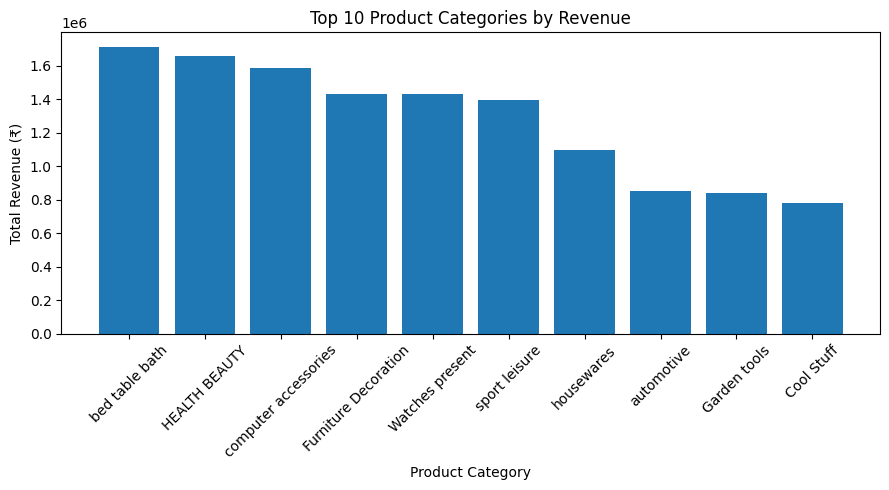

In [136]:
total_revenue = """SELECT  
  p."product category", 
  ROUND(SUM(pa.payment_value):: NUMERIC ,2) AS total_amount,
  ROUND((SUM(pa.payment_value) * 100.0 / (SELECT SUM(payment_value) 
  											FROM payments))::NUMERIC, 2) AS payment_percentage
FROM payments AS pa
JOIN order_items AS oi 
  ON pa.order_id = oi.order_id
JOIN products AS p
  ON p.product_id = oi.product_id
GROUP BY p."product category"
ORDER BY total_amount DESC"""

cur.execute(total_revenue)
data = cur.fetchall()
data 

top_10_data = data[:10]

# Split into labels and values
categories = [row[0] for row in top_10_data]
total_revenue = [row[1] for row in top_10_data]

# Plot the Bar Chart
plt.figure(figsize=(9, 5))
plt.bar(categories, total_revenue)

# Add Labels & Title
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (₹)")
plt.title("Top 10 Product Categories by Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Identify the correlation between product price and the number of times a product has been purchased.

In [137]:
correlation = """SELECT CORR(price, total_order) AS 	price_order_correlation
FROM (
	SELECT DISTINCT product_id , price , COUNT(order_id) AS total_order
	FROM order_items 
	GROUP BY product_id, price
	ORDER BY  total_order DESC )AS x
"""

cur.execute(correlation)
data = cur.fetchall()
data 


[(-0.04421869277068907,)]

C:\Users\pushp\AppData\Local\Temp\ipykernel_21728\1405766339.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Seller ID", y="Total Revenue", data=top_10_df, palette="viridis")


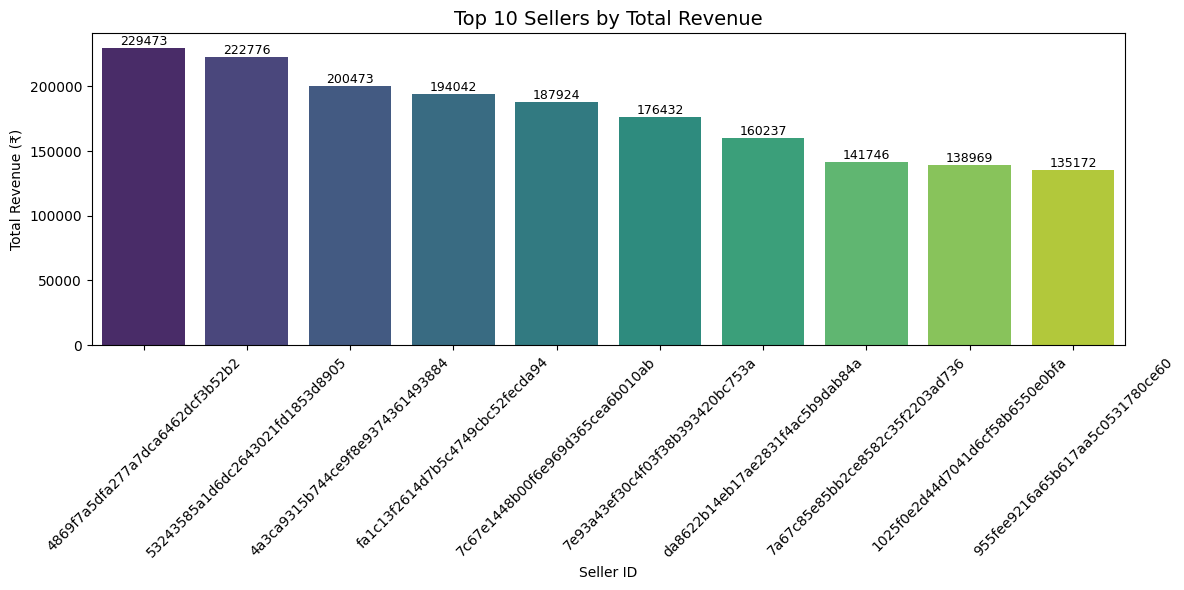

In [138]:
revenue_by_seller = """
SELECT *,
RANK() OVER(ORDER BY total_revenue DESC) AS ranking
FROM (
    SELECT s.seller_id, 
           ROUND(SUM(oi.price)::NUMERIC, 2) AS total_revenue
    FROM sellers AS s
    JOIN order_items AS oi ON s.seller_id = oi.seller_id
    GROUP BY s.seller_id
) AS x
"""

# 3. Execute and fetch data
cur.execute(revenue_by_seller)
data = cur.fetchall()

# 4. Close DB connection
cur.close()
conn.close()

# 5. Load into Pandas DataFrame
df = pd.DataFrame(data, columns=["Seller ID", "Total Revenue", "Rank"])

# 6. Select Top 10
top_10_df = df.head(10)

# 7. Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="Seller ID", y="Total Revenue", data=top_10_df, palette="viridis")

# 8. Add annotations on top
for index, row in top_10_df.iterrows():
    plt.text(index, row["Total Revenue"] + 100, f"{row['Total Revenue']:.0f}", 
             ha='center', va='bottom', fontsize=9)

# 9. Beautify chart
plt.title("Top 10 Sellers by Total Revenue", fontsize=14)
plt.xlabel("Seller ID")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. Calculate the total revenue generated by each seller, and rank them by revenue.

__Advanced Queries__

Calculate the moving average of order values for each customer over their order history.

2. Calculate the cumulative sales per month for each year.

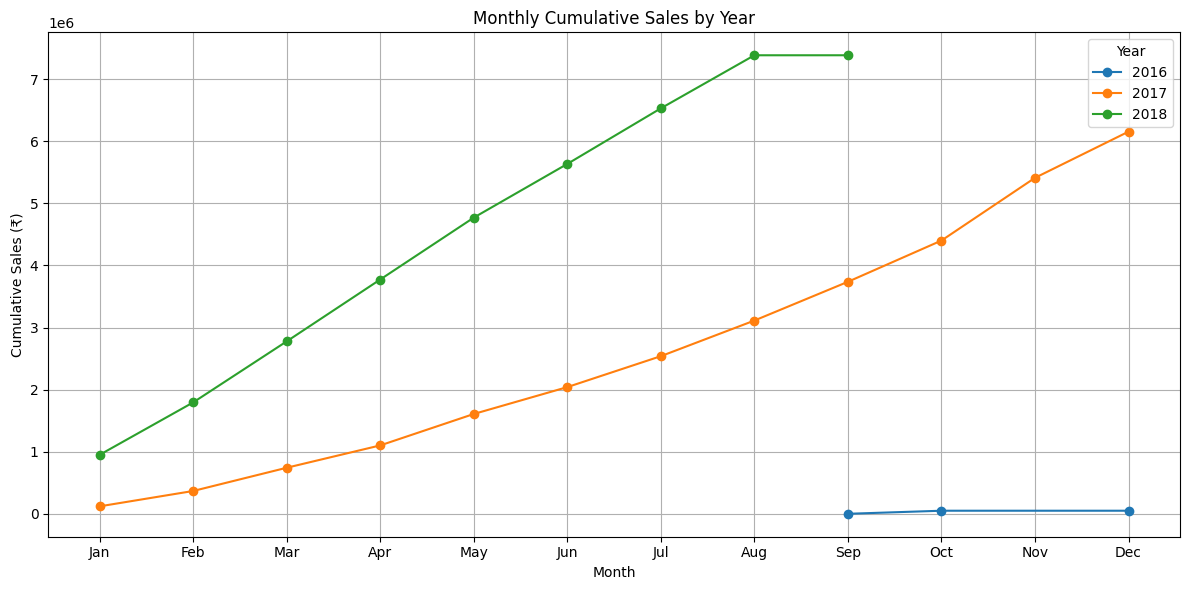

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# 1. Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="ecommerce_analysis",
    user="postgres",
    password="Password",     
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# 2. SQL query for cumulative sales
cummulative_sales = """
SELECT *,
SUM(total_sales) OVER(PARTITION BY year ORDER BY month_no) AS cumulative_sales
FROM (
	SELECT  
        EXTRACT(YEAR FROM order_purchase_timestamp::DATE) AS year,
		EXTRACT(MONTH FROM order_purchase_timestamp::DATE) AS month_no,
		INITCAP(TO_CHAR(order_purchase_timestamp::DATE, 'Month')) AS order_month,
		ROUND(SUM(oi.price)::NUMERIC, 2) AS total_sales 
	FROM orders AS o
	JOIN order_items AS oi ON o.order_id = oi.order_id
	GROUP BY year, month_no, order_month
) AS x
ORDER BY year, month_no
"""

# 3. Execute query
cur.execute(cummulative_sales)
data = cur.fetchall()

# 4. Close cursor and connection
cur.close()
conn.close()

# 5. Convert to DataFrame
df = pd.DataFrame(data, columns=["Year", "Month No", "Month", "Total Sales", "Cumulative Sales"])

# 6. Plot cumulative sales per year
plt.figure(figsize=(12, 6))
for year in df["Year"].unique():
    yearly_df = df[df["Year"] == year]
    plt.plot(yearly_df["Month No"], yearly_df["Cumulative Sales"], marker='o', label=f"{int(year)}")

plt.title("Monthly Cumulative Sales by Year")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales (₹)")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()


 3. Calculate the year-over-year growth rate of total sales.

C:\Users\pushp\AppData\Local\Temp\ipykernel_21728\2638784987.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Total Revenue", data=df, palette="Blues_d")


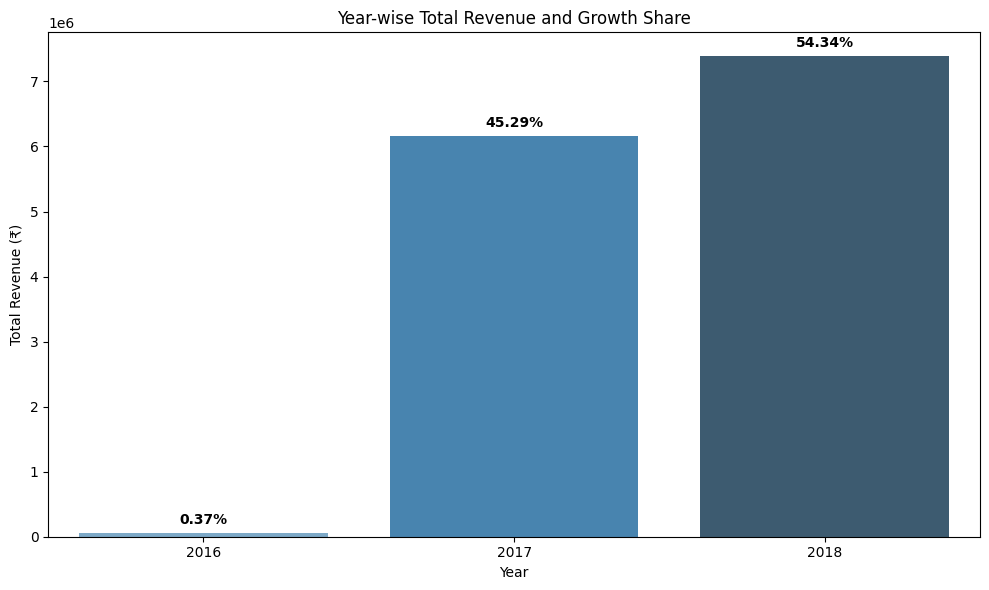

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# 1. Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="ecommerce_analysis",
    user="postgres",
    password="Password",     
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# 2. Query to fetch yearly revenue and growth
year_growth = """
SELECT  
    EXTRACT(YEAR FROM order_purchase_timestamp::DATE) AS year, 
    ROUND(SUM(oi.price)::NUMERIC, 2) AS total_revenue,
    ROUND((
        SUM(oi.price) * 100.0 / 
        (SELECT SUM(price) FROM order_items)
    )::NUMERIC, 2) AS growth_percentage
FROM orders AS o
JOIN order_items AS oi ON oi.order_id = o.order_id 
GROUP BY year
ORDER BY year
"""

cur.execute(year_growth)
data = cur.fetchall()

cur.close()
conn.close()

# 3. Convert to DataFrame
df = pd.DataFrame(data, columns=["Year", "Total Revenue", "Growth %"])

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Total Revenue", data=df, palette="Blues_d")

# Annotate growth %
for i in range(len(df)):
    plt.text(i, df["Total Revenue"][i] + 100000, f'{df["Growth %"][i]}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Year-wise Total Revenue and Growth Share")
plt.xlabel("Year")
plt.ylabel("Total Revenue (₹)")
plt.tight_layout()
plt.show()


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# 1. Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="ecommerce_analysis",
    user="postgres",
    password="Password",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# 2. Query: Retained customers with repeat orders
retention_rate = """
SELECT customer_id, SUM(total_order_permonth) AS orders 
FROM (
	SELECT 
		EXTRACT(MONTH FROM order_purchase_timestamp::DATE) AS month_no,
		TO_CHAR(order_purchase_timestamp::DATE, 'Month') AS order_month, 
		order_purchase_timestamp::DATE, 
		customer_id, 
		COUNT(order_id) AS total_order_perMonth
	FROM orders
	WHERE order_purchase_timestamp::DATE >= '2018-10-17'::DATE - INTERVAL '6 Month'
	GROUP BY month_no, order_month, customer_id, order_purchase_timestamp::DATE 
) AS x
GROUP BY customer_id
HAVING SUM(total_order_permonth) > 1
ORDER BY orders DESC
"""

cur.execute(retention_rate)
data = cur.fetchall()

# Close connection
cur.close()
conn.close()

# 3. Load into DataFrame
df = pd.DataFrame(data, columns=["Customer ID", "Total Orders"])

# ✅ Drop NaN rows and convert to integer
df = df.dropna(subset=["Total Orders"])
df["Total Orders"] = df["Total Orders"].astype(int)

# ✅ Avoid plotting if DataFrame is empty
if df.empty:
    print("⚠️ No repeat orders found in the last 6 months.")
else:
    # 4. Plot: Histogram of repeat orders
    plt.figure(figsize=(10, 6))
    sns.histplot(
        df["Total Orders"],
        bins=range(2, df["Total Orders"].max() + 2),
        kde=False,
        color="skyblue",
        edgecolor="black"
    )

    plt.title("Distribution of Repeat Orders (Last 6 Months)", fontsize=14)
    plt.xlabel("Number of Orders per Customer", fontsize=12)
    plt.ylabel("Number of Customers", fontsize=12)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()




⚠️ No repeat orders found in the last 6 months.


5. Identify the top 3 customers who spent the most money in each year.

   Year                       Customer ID Total Amount  Rank
0  2016  a9dc96b027d1252bbac0a9b72d837fc6      1423.55     1
1  2016  1d34ed25963d5aae4cf3d7f3a4cda173      1400.74     2
2  2016  4a06381959b6670756de02e07b83815f      1227.78     3
3  2017  1617b1357756262bfa56ab541c47bc16     13664.08     1
4  2017  c6e2731c5b391845f6800c97401a43a9      6929.31     2
5  2017  3fd6777bbce08a352fddd04e4a7cc8f6      6726.66     3
6  2018  ec5b2ba62e574342386871631fafd3fc      7274.88     1
7  2018  f48d464a0baaea338cb25f816991ab1f      6922.21     2
8  2018  e0a2412720e9ea4f26c1ac985f6a7358      4809.44     3


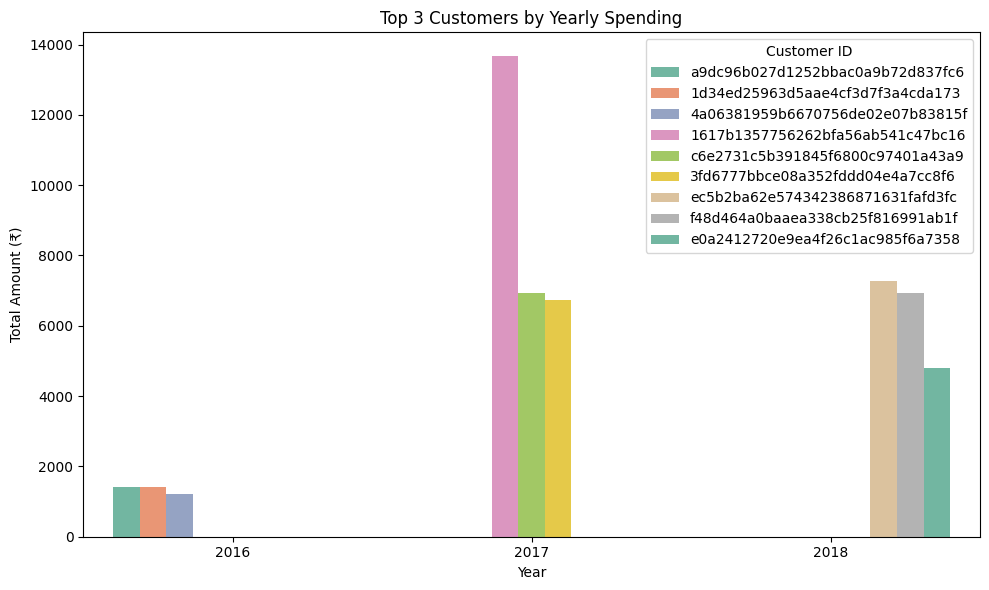

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# 1. Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="ecommerce_analysis",
    user="postgres",
    password="Password",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

# 2. SQL Query: Top 3 customers per year by total amount spent
top_customers_query = """
SELECT year, customer_id, ROUND(total_amount::NUMERIC, 2) AS total_amount, ranking
FROM (
	SELECT *,
	RANK() OVER(PARTITION BY year ORDER BY total_amount DESC) AS ranking
	FROM (
		SELECT 
			EXTRACT(YEAR FROM order_purchase_timestamp::DATE) AS year, 
			customer_id, 
			SUM(p.payment_value) AS total_amount
		FROM orders AS o
		JOIN payments AS p ON p.order_id = o.order_id 
		GROUP BY year, customer_id
	) AS x
) AS y
WHERE ranking <= 3
ORDER BY year, total_amount DESC;
"""

# 3. Execute and fetch data
cur.execute(top_customers_query)
data = cur.fetchall()

# 4. Close connection
cur.close()
conn.close()

# 5. Load into DataFrame
df = pd.DataFrame(data, columns=["Year", "Customer ID", "Total Amount", "Rank"])
print(df)

# 6. Plot: Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Year", y="Total Amount", hue="Customer ID", palette="Set2")

plt.title("Top 3 Customers by Yearly Spending")
plt.ylabel("Total Amount (₹)")
plt.xlabel("Year")
plt.legend(title="Customer ID")
plt.tight_layout()
plt.show()


